### K-means

In [2]:
#多维特征数据进行聚类分析
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#导入数据
data = pd.read_csv("D:/2023美赛/2023C/attributes.csv")
word=list(data["Word"])
del data["average times"]
del data["level"]
del data["Word"]
data['word frequency']=np.log(data['word frequency'])
# species=list(df['level'])
df = (data - data.mean(axis = 0))/(data.std(axis = 0))
# df['word frequency'][1]
samples=df.values
data

,repeatimes,Syllables,word pinlv,word frequency
0,0,1,0.213370,8.106816
1,0,1,0.270752,8.210124
2,1,1,0.307521,7.748460
3,0,2,0.249025,8.272060
4,0,1,0.229526,11.209642
...,...,...,...,...
354,1,2,0.266852,8.414274
355,0,2,0.288022,5.241747
356,0,2,0.255153,8.234034
357,0,2,0.329805,6.269096


In [246]:
# # 白化
# from sklearn import preprocessing as pp
# from sklearn.decomposition import PCA
# m = PCA(whiten=True) # 实例化主成分分析类，指定白化参数
# m.fit(samples) # 主成分分析

# d = m.transform(samples) # 返回主成分分析结果
# d # 特征列从6个降至4个
# d.std(axis=0)
# d = pp.scale(d) # 标准化
# d.std(axis=0) 
# samples=d

In [250]:
# df=pd.read_csv('/fish.csv')
# species=list(df['species'])
# print(species)
# del df['species']
# print(df.head())
from collections import Counter
scaler=StandardScaler()#标准化
kmeans=KMeans(n_clusters=3)
# pipeline=make_pipeline(scaler,kmeans)

# pipeline.fit(samples)#训练模型
# labels=pipeline.predict(samples)#预测
kmeans.fit(samples)
labels=kmeans.predict(samples)#预测
# df=pd.DataFrame({'labels':labels,'species':species})
# ct=pd.crosstab(df['labels'],df['species'])
# print(ct)
results=pd.DataFrame({'word':word,'level':labels,'repeat':df['repeatimes'],'syllables':df['Syllables'],'letter freq':df['word pinlv'],'word freq':df['word frequency']})
# results['level']=labels
# results['word']=word
# Counter(results['level'])
pd.set_option('display.max_rows',None)
print(results)
# print(df)

      word  level    repeat  syllables  letter freq  word freq
0    slump      0 -0.578791  -0.921056    -1.506389  -0.225235
1    crank      0 -0.578791  -0.921056    -0.338148  -0.174085
2    gorge      2  1.478496  -0.921056     0.410434  -0.402665
3    query      1 -0.578791   0.936580    -0.780492  -0.143419
4    drink      0 -0.578791  -0.921056    -1.177467   1.311042
5    favor      1 -0.578791   0.936580    -0.372174   1.150798
6    abbey      2  1.478496   0.936580    -0.564991  -0.153388
7    tangy      1 -0.578791   0.936580    -0.304121  -0.821896
8    panic      1 -0.578791   0.936580    -0.360832   0.622298
9    solar      1 -0.578791   0.936580     1.238411   0.979860
10   shire      0 -0.578791  -0.921056     0.693988  -1.188548
11   proxy      1 -0.578791   0.936580    -1.324915   0.001070
12   point      0 -0.578791  -0.921056     0.013459   2.172174
13   robot      2  1.478496   0.936580     0.501171   0.420977
14   prick      0 -0.578791  -0.921056    -1.256862  -0

C:\Users\81086\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\81086\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


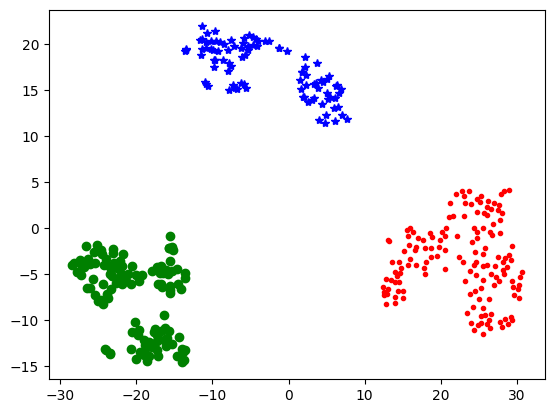

In [251]:
from sklearn.manifold import TSNE
tsne=TSNE()
tsne.fit_transform(df)  #进行数据降维,降成两维
#a=tsne.fit_transform(data_zs) #a是一个array,a相当于下面的tsne_embedding
tsne=pd.DataFrame(tsne.embedding_,index=df.index) #转换数据格式

d0=tsne[results['level']==0]
plt.plot(d0[0],d0[1],'r.')

d1=tsne[results['level']==1]
plt.plot(d1[0],d1[1],'go')

d2=tsne[results['level']==2]
plt.plot(d2[0],d2[1],'b*')

plt.show()

In [37]:
# Calinski-Harabaz 指数
from sklearn.metrics import calinski_harabasz_score
for i in range(2,7):
    kmeans=KMeans(n_clusters=i,random_state=123).fit(samples)
    score=calinski_harabasz_score(samples,kmeans.labels_)
    print('聚类%d簇的calinski_harabaz分数为：%f'%(i,score))
#聚类2簇的calinski_harabaz分数为：3535.009345
#聚类3簇的calinski_harabaz分数为：3153.860287
#聚类4簇的calinski_harabaz分数为：3356.551740
#聚类5簇的calinski_harabaz分数为：3145.500663
#聚类6簇的calinski_harabaz分数为：3186.529313

聚类2簇的calinski_harabaz分数为：283.301317
聚类3簇的calinski_harabaz分数为：264.376901
聚类4簇的calinski_harabaz分数为：240.520924
聚类5簇的calinski_harabaz分数为：217.317529
聚类6簇的calinski_harabaz分数为：208.197242


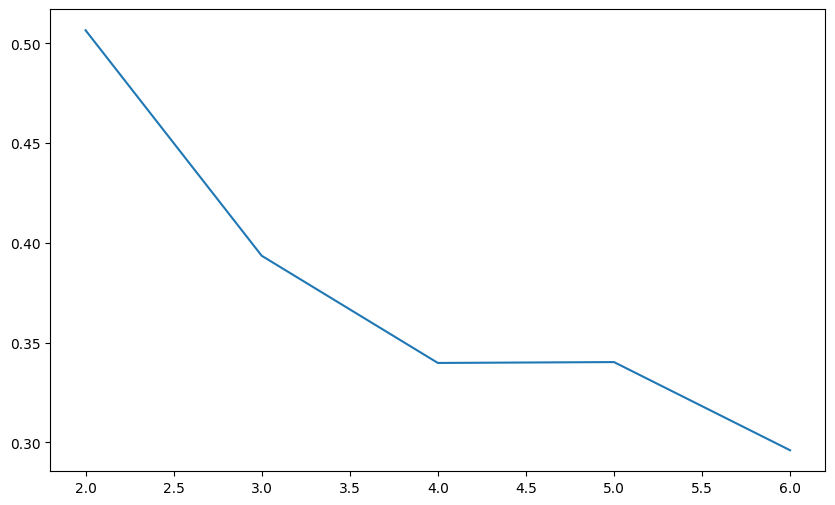

In [47]:
# 轮廓系数（Silhouette Coefficient）
from sklearn.metrics import silhouette_score
silhouettescore=[]
for i in range(2,7):
    kmeans=KMeans(n_clusters=i,random_state=123).fit(samples)
    score=silhouette_score(samples,kmeans.labels_)
    silhouettescore.append(score)
plt.figure(figsize=(10,6))
plt.plot(range(2,7),silhouettescore,linewidth=1.5,linestyle='-')
plt.show()


2 类的簇内误差平方和SSE为 395.5088791539464
3 类的簇内误差平方和SSE为 260.58687737530005
4 类的簇内误差平方和SSE为 204.93795276421184
5 类的簇内误差平方和SSE为 175.7240214582042
6 类的簇内误差平方和SSE为 150.60930256684867


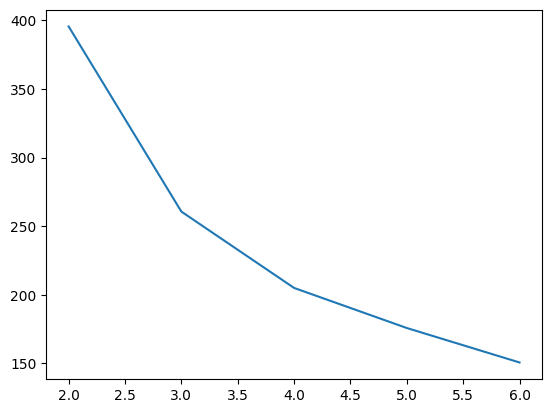

In [59]:
# SSE
sse=[]
for i in range(2,7):
    kmeans=KMeans(n_clusters=i,random_state=123).fit(samples)
    sse.append(kmeans.inertia_)
    print(i,"类的簇内误差平方和SSE为",kmeans.inertia_)
plt.plot(range(2,7),sse,linewidth=1.5,linestyle='-')
plt.show()

### K-means++

In [215]:
def distance(e1, e2):
    return np.sqrt((e1[0]-e2[0])**2+(e1[1]-e2[1])**2+(e1[2]-e2[2])**2+(e1[3]-e2[3])**2) #欧式距离，较为准确

 #return np.abs(e1[0]-e2[0])+np.abs(e1[1]-e2[1]) #曼哈顿距离  
 #return np.abs(e1[0]-e2[0]) if np.abs(e1[0]-e2[0])>np.abs(e1[1]-e2[1]) else np.abs(e1[1]-e2[1]) #切比雪夫距离

# 集合中心
def means(arr):
    return np.array([np.mean([e[0] for e in arr]), np.mean([e[1] for e in arr]),np.mean([e[2] for e in arr]),np.mean([e[3] for e in arr])])

# arr中距离a最远的元素，用于初始化聚类中心
def farthest(k_arr, arr):
    f = [0, 0,0,0]
    max_d = 0
    for e in arr: #第一层循环
        d = 0
        for i in range(k_arr.__len__()): #第二层循环
            d = d + np.sqrt(distance(k_arr[i], e)) #把e到k_array里面每一个元素的距离累加
        if d > max_d: #如果当前元素比已经扫描过的元素距离远 ，更新最远距离
            max_d = d #更新最远距离元素
            f = e
    return f #返回arr中离 k_arr中所有元素 最远的元素

# arr中距离a最近的元素，用于聚类 a为聚类中心
def closest(a, arr): 
    c = arr[1]
    min_d = distance(a, arr[1])
    arr = arr[1:]
    for e in arr:
        d = distance(a, e)
        if d < min_d:
            min_d = d
            c = e
    return c

# 切片说明 arr[start:end:step] 
# start缺省 ：index=0 开始 
# end缺省 ：index=len（arr)-1
# step缺省 ：步长为+1
#例子 In: a=[10,20,30,40,50,60,70]
# In:a[:]  
#  => out:[10,20,30,40,50,60,70]

# In:a[::]   
# => out:[10,20,30,40,50,60,70]

# In:a[-1]   #最后一个元素
# => out:70

# In:a[:-2]   #相当于[0,-2) -1最后一个 -2倒数第二个
# => out:[10,20,30,40,50]

# In:a[::-1]  #逆序输出 逆序切皮 相当于 a[6:0:-1]
#  => out:[70,60,50,40,30,20,10]

# In:a[2::-1]  #逆序输出 相当于 a[2:0:-1]
#  => out:[30,20,10]


In [238]:
## 生成二维随机坐标，手上有数据集的朋友注意，理解arr改起来就很容易了
## arr是一个数组，每个元素都是一个二元组，代表着一个坐标
## arr形如：[ (x1, y1), (x2, y2), (x3, y3) ... ]
# arr = np.random.randint(100, size=(100, 1, 2))[:, 0, :]
arr=samples
# 初始化聚类中心和聚类容器
m = 3
r = np.random.randint(arr.__len__() - 1)#随机选择聚类中心 ，可以通过k-means++的方法对随机选择中心点进行优化
k_arr = np.array([arr[r]]) #取出选择的聚类中心
# print(k_arr)
cla_arr = [[]]
for i in range(m-1):
    k = farthest(k_arr, arr) #由一个聚类中心选择一个新的聚类中心
    k_arr = np.concatenate([k_arr, np.array([k])]) #数组拼接  把聚类中心 拼接在k_arr数组里
    cla_arr.append([])#每找到一个聚类中心，增加一个类

## 迭代聚类
n = 20
cla_temp = cla_arr
for i in range(n):    # 迭代n次
    for e in arr:    # 把集合里每一个元素聚到最近的类
        ki = 0        # 假定距离第一个中心最近
        min_d = distance(e, k_arr[ki])
        for j in range(1, k_arr.__len__()):
            if distance(e, k_arr[j]) < min_d:    # 找到更近的聚类中心
                min_d = distance(e, k_arr[j])
                ki = j
        cla_temp[ki].append(e) #将元素加入最近的聚类中心的类中
    # 迭代更新聚类中心
    for k in range(k_arr.__len__()):
        if n - 1 == i:
            break
        k_arr[k] = means(cla_temp[k])  
        cla_temp[k] = []
        # 原聚类中心 为 firstcenter 
        # 通过迭代等到了 一个包含众多满足聚类条件的集合 
        # 通过整个集合的数据求出 当前集合的中心 
        # 作为新聚类中心  newcenter 
        # 即firstcenter 为聚类条件判断的起始点 而newcneter 为集合实际中心 
        # 更新聚类中心结果如图一 不更新聚类结果如图二
# print(k_arr)
# for k in range(len(df)):
#     for i in range(m):
#         for j in range(len(cla_temp[i])):
#                 if cla_temp[i][j][2]==df['word frequency'][k]
#         print(i,"=",cla_temp[i],'\n','\n')
l1=[]
l2=[]
l3=[]
l4=[]
l5=[]
for i in range(m):
    for j in range(len(cla_temp[i])):
        l1.append(cla_temp[i][j][0])
        l2.append(cla_temp[i][j][1])
        l3.append(cla_temp[i][j][2])
        l4.append(cla_temp[i][j][3])
        l5.append(i)
#         print(cla_temp[i][j])
# print(cla_temp[0][0])
result2=pd.DataFrame({'level':l5,'repeat':l1,'syllables':l2,'letter freq':l3,'word freq':l4})
pd.merge(results,result2,on=['letter freq'])

,word,level_x,repeat_x,syllables_x,letter freq,word freq_x,level_y,repeat_y,syllables_y,word freq_y
0,slump,0,-0.578791,-0.921056,-1.506389,-0.225235,0,-0.578791,-0.921056,-0.225235
1,crank,0,-0.578791,-0.921056,-0.338148,-0.174085,0,-0.578791,-0.921056,-0.174085
2,crank,0,-0.578791,-0.921056,-0.338148,-0.174085,0,-0.578791,-0.921056,-0.872736
3,crank,0,-0.578791,-0.921056,-0.338148,-0.174085,1,1.478496,-0.921056,-0.107079
4,girth,0,-0.578791,-0.921056,-0.338148,-0.872736,0,-0.578791,-0.921056,-0.174085
5,girth,0,-0.578791,-0.921056,-0.338148,-0.872736,0,-0.578791,-0.921056,-0.872736
6,girth,0,-0.578791,-0.921056,-0.338148,-0.872736,1,1.478496,-0.921056,-0.107079
7,booze,1,1.478496,-0.921056,-0.338148,-0.107079,0,-0.578791,-0.921056,-0.174085
8,booze,1,1.478496,-0.921056,-0.338148,-0.107079,0,-0.578791,-0.921056,-0.872736
9,booze,1,1.478496,-0.921056,-0.338148,-0.107079,1,1.478496,-0.921056,-0.107079


In [221]:
 # 距离度量函数,两个向量间的距离
def calc_distance(vec1, vec2):
    return np.sqrt(sum(np.power(vec1 - vec2, 2)))
 
# 初始聚类中心
def crate_centroid(data, k):
    centriods = np.zeros((k, n))
    centriods[0, 0] = 2
    centriods[0, 1] = 10
    centriods[1, 0] = 5
    centriods[1, 1] = 8
    centriods[2, 0] = 1
    centriods[1, 0] = 2
    return centriods
 
def kMeans(data, k, dist=calc_distance, crate_center=crate_centroid):
    # 初始化矩阵，存储中间结果
    # 第一列存储索引，第二例存储距离
    # 样本的个数
    m = np.shape(data)[0]
    init = np.zeros((m, 2))
    cluster_assment = np.mat(init)
 
    # 初始化聚类中心
    centroids = crate_centroid(data, k)
 
    # 遍历算距离
    for epoch in range(1):
        for i in range(m):
            min_dist = np.inf
            min_index = -1
            # 每个样本点到质心距离
            for j in range(k):
                dist_ij = calc_distance(centroids[j, :], data[i, :])
                if dist_ij < min_dist:
                    min_dist = dist_ij
                    min_index = j
                    cluster_assment[i, :] = min_index, min_dist
        # 更新聚类中心
        for i in range(k):
            # .A把矩阵转成数组
            pts_in_cluster = data[np.nonzero(cluster_assment[:, 0].A == i)[0]]
            centroids[i, :] = np.mean(pts_in_cluster, axis=0)
 
    return centroids, cluster_assment
 
print(centroids)
print(cluster_assment)
# # 创建数据集
# # data = array([[2, 10], [2, 5], [8, 4], [5, 8], [7, 5], [6, 4], [1, 2], [4, 9], [3, 3], [4, 5], [3, 6], [2, 2], [1, 3], [3, 9]])
# data=samples
# k = 3
# n = 4  # 数据的特征个数

# centroids, cluster_assment = kMeans(data, k, dist=calc_distance, crate_center=crate_centroid)
# predict_label = cluster_assment[:, 0]
# data_and_pred = np.column_stack((data, predict_label))

# # 原始数据样本和预测类别
# df = pd.DataFrame(data_and_pred, columns=['data1', 'data2','data3','data4', 'pred'])
# df0 = df[df.pred == 0].values
# df1 = df[df.pred == 1].values
# df2 = df[df.pred == 2].values
# df2

[[            nan             nan             nan             nan]
 [            nan             nan             nan             nan]
 [ 9.27762973e-18 -5.05321566e-16 -1.58492841e-16 -5.68409448e-16]]
[[2.         2.37925746]
 [2.         1.86696958]
 [2.         1.18654894]
 [2.         1.99987481]
 [2.         2.53893413]
 [2.         2.19832049]
 [2.         1.20369541]
 [2.         2.0341498 ]
 [2.         1.97160287]
 [2.         2.42147708]
 [2.         2.28805436]
 [2.         2.26388248]
 [2.         2.83891643]
 [2.         1.23876343]
 [2.         2.22720157]
 [2.         2.05141557]
 [2.         2.38367708]
 [2.         1.3637849 ]
 [2.         2.14524435]
 [2.         2.51757071]
 [2.         2.03528805]
 [2.         2.0478545 ]
 [2.         3.479796  ]
 [2.         2.67322165]
 [2.         2.65676874]
 [2.         3.32237272]
 [2.         1.83007129]
 [2.         2.09253641]
 [2.         3.02687524]
 [2.         1.99828576]
 [2.         1.52553132]
 [2.         2.53220668

In [25]:
import pandas as pd
from numpy import *
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve
from sklearn.metrics import accuracy_score,recall_score,f1_score
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split

import xgboost as xgb
import lightgbm as lgb

In [92]:
data = pd.read_csv("D:/2023美赛/2023C/attributes.csv")
# data['level']=labels
data['word frequency']=np.log(data['word frequency'])
X=data[['repeatimes','Syllables','word pinlv','word frequency']].iloc[:-1]
Y=data['level1'].iloc[:-1]
# X.iloc[-1]
eerie=data[['repeatimes','Syllables','word pinlv','word frequency']].iloc[-1]
r1=[2]
r2=[2]
r3=[0.438440]
r4=[8.200014]
eerie=pd.DataFrame({'repeatimes':r1,'Syllables':r2,'word pinlv':r3,'word frequency':r4})

In [94]:
tr_x,te_x,tr_y,te_y=train_test_split(X,Y,test_size=0.2,random_state=5)

print("\n随机森林:")
rf=RandomForestClassifier(max_depth=20,n_estimators=100,random_state=0)
rf.fit(tr_x,tr_y)
print("训练集准确度:{:.3f}".format(rf.score(tr_x,tr_y)))
print("测试集准确度:{:.3f}".format(rf.score(te_x,te_y)))
y_pred = rf.predict(te_x)
print("平均绝对误差:",mean_absolute_error(te_y, y_pred))
print("ACC",accuracy_score(te_y,y_pred))
print("REC",recall_score(te_y,y_pred,average="weighted"))
print("F-score",f1_score(te_y,y_pred,average="weighted"))

print('eerie',rf.predict(eerie))


随机森林:
训练集准确度:1.000
测试集准确度:0.917
平均绝对误差: 0.08333333333333333
ACC 0.9166666666666666
REC 0.9166666666666666
F-score 0.9160984848484848
eerie [1.]


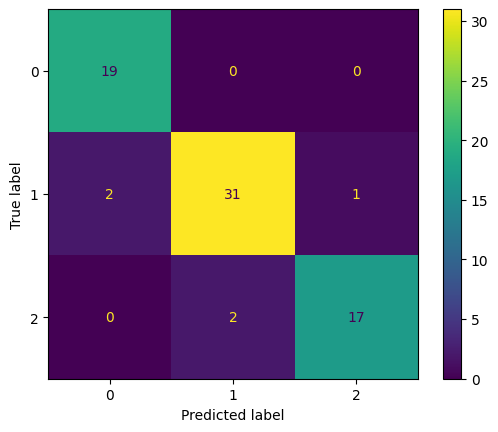

In [72]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
te_y
y_pred
cm = confusion_matrix(te_y, y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()

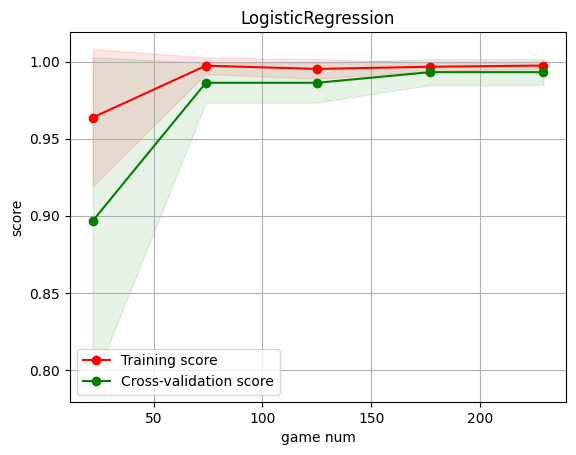

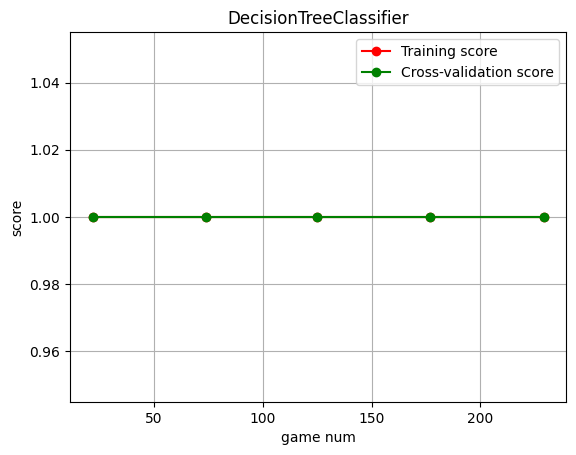

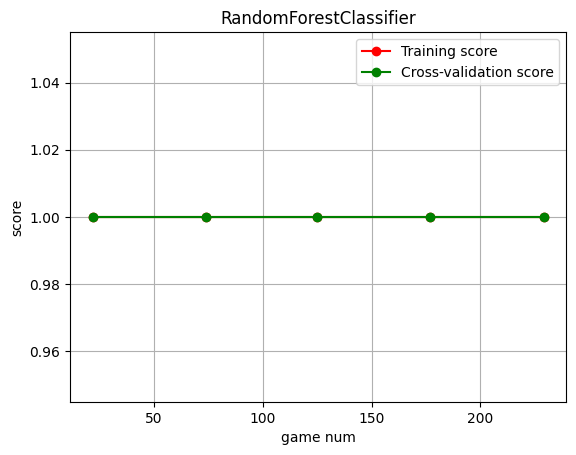

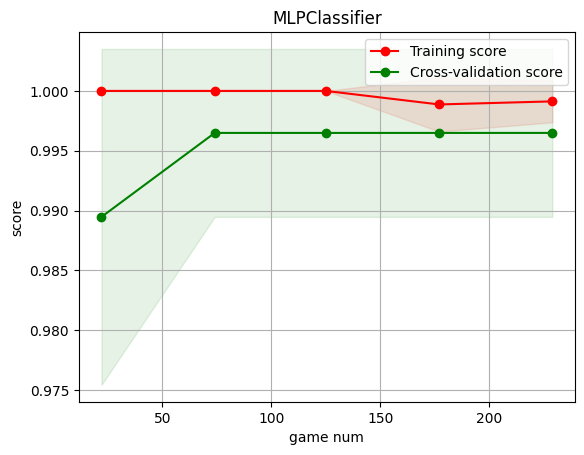

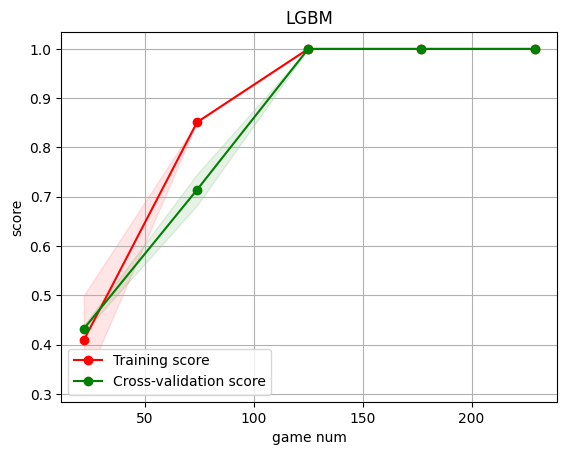

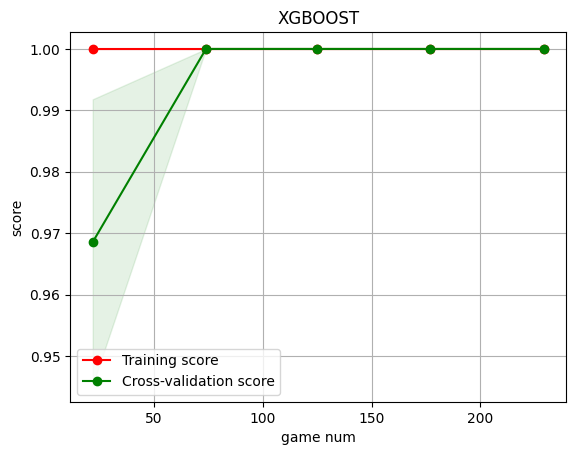

<module 'matplotlib.pyplot' from 'C:\\Users\\81086\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [293]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


# 学习曲线函数

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("game num")
    plt.ylabel("score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
#     plt.savefig('./Q3/%s.jpg'%title)
    plt.legend(loc="best")
    plt.show()
    return plt

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
plot_learning_curve(logreg, "LogisticRegression", tr_x, tr_y, ylim=None, cv=cv, n_jobs=1)
plot_learning_curve(tree, "DecisionTreeClassifier", tr_x, tr_y, ylim=None, cv=None, n_jobs=1)
plot_learning_curve(rf, "RandomForestClassifier", tr_x, tr_y, ylim=None, cv=None, n_jobs=1)
plot_learning_curve(model, "MLPClassifier", tr_x, tr_y, ylim=None, cv=None, n_jobs=1)

plot_learning_curve(lgb_model, "LGBM", tr_x, tr_y, ylim=None, cv=None, n_jobs=1)
plot_learning_curve(xgb_model, "XGBOOST", tr_x, tr_y, ylim=None, cv=None, n_jobs=1)